importing dependencies


In [138]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

In [139]:
data=pd.read_csv('Train.csv')

In [140]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [141]:
data.shape

(8523, 12)

In [142]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


Categorical Features


*   Item_Identifier
*   Item_Fat_Content
*   Item_Type
*   Outlet_Identifier
*   Outlet_Size
*   Outlet_Type
*   Outlet_Location_Type




In [143]:
data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [144]:
#HAndling missing
# MEan

In [145]:
data['Item_Weight'].mean()

12.857645184135976

In [146]:
data['Item_Weight'].fillna(data['Item_Weight'].mean(),inplace=True)

In [147]:
data.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [148]:
mode_of_outletsize=data.pivot_table(values='Outlet_Size',columns ='Outlet_Type',aggfunc=(lambda x: x.mode()[0]))

In [149]:
mode_of_outletsize

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,Small,Small,Medium,Medium


In [150]:
missing_value = data['Outlet_Size'].isnull()

In [151]:
missing_value

0       False
1       False
2       False
3        True
4       False
        ...  
8518    False
8519     True
8520    False
8521    False
8522    False
Name: Outlet_Size, Length: 8523, dtype: bool

In [152]:
data.loc[missing_value,'Outlet_Size']=data.loc[missing_value,'Outlet_Type'].apply(lambda x: mode_of_outletsize)

In [153]:
data.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

Data Analysis


In [154]:
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


Numerical Features


In [155]:
sns.set()

<ipython-input-156-eba8db876ace>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Item_Weight'])


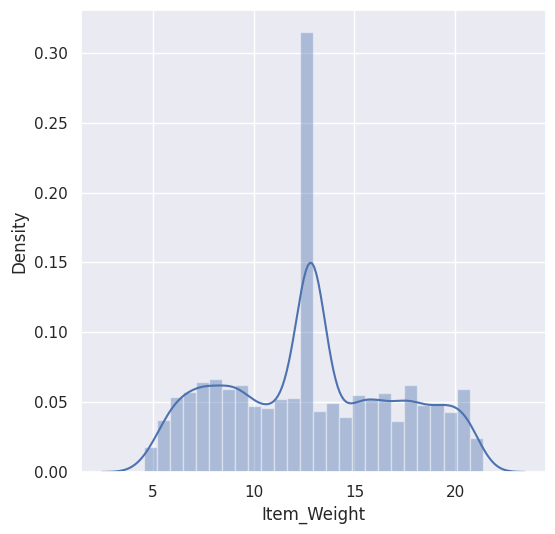

In [156]:
plt.figure(figsize=(6,6))
sns.distplot(data['Item_Weight'])
plt.show()


<ipython-input-157-9bc277e39cf4>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Item_Visibility'])


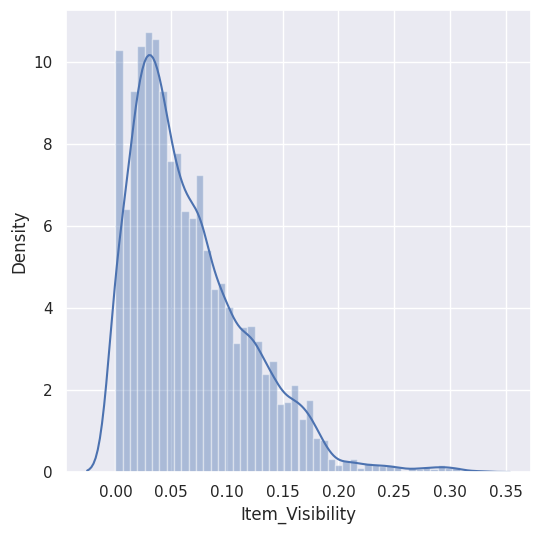

In [157]:
plt.figure(figsize=(6,6))
sns.distplot(data['Item_Visibility'])
plt.show()


<ipython-input-158-9168d8271af4>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Item_MRP'])


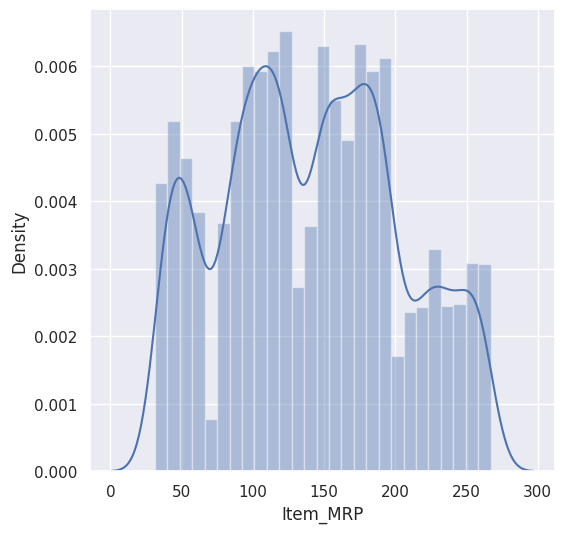

In [158]:
plt.figure(figsize=(6,6))
sns.distplot(data['Item_MRP'])
plt.show()


<ipython-input-159-39a234040911>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Item_Outlet_Sales'])


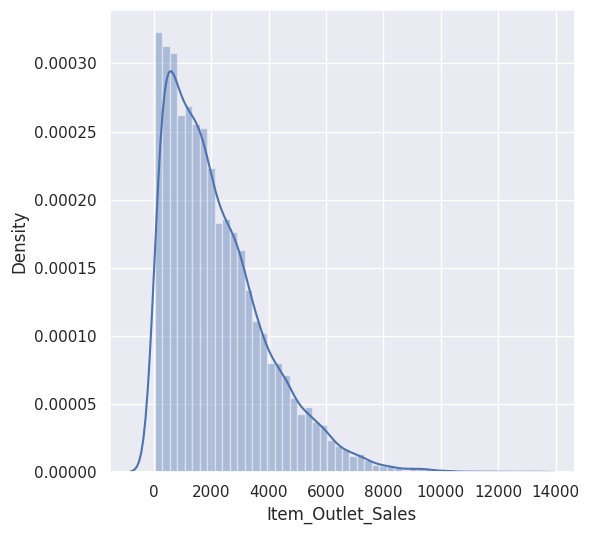

In [159]:
plt.figure(figsize=(6,6))
sns.distplot(data['Item_Outlet_Sales'])
plt.show()


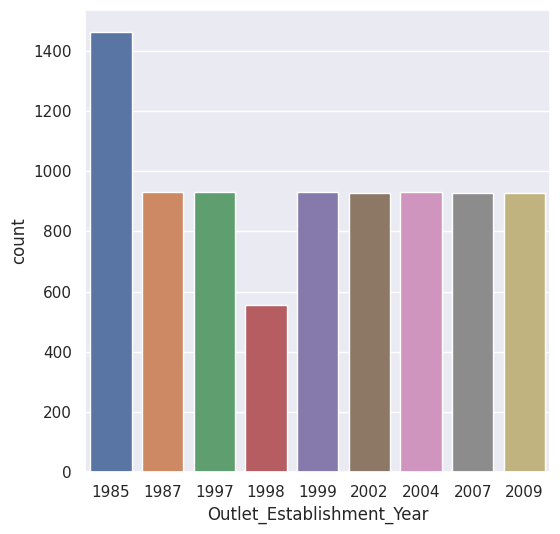

In [160]:
plt.figure(figsize=(6,6))
sns.countplot(x='Outlet_Establishment_Year',data=data)
plt.show()

Categorical Features



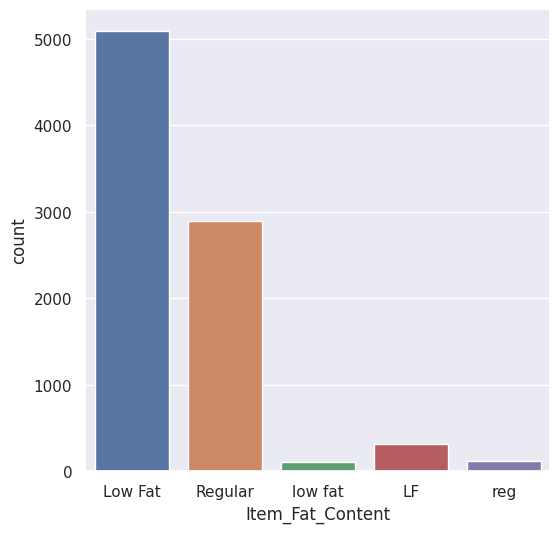

In [161]:
plt.figure(figsize=(6,6))
sns.countplot(x='Item_Fat_Content',data=data)
plt.show()

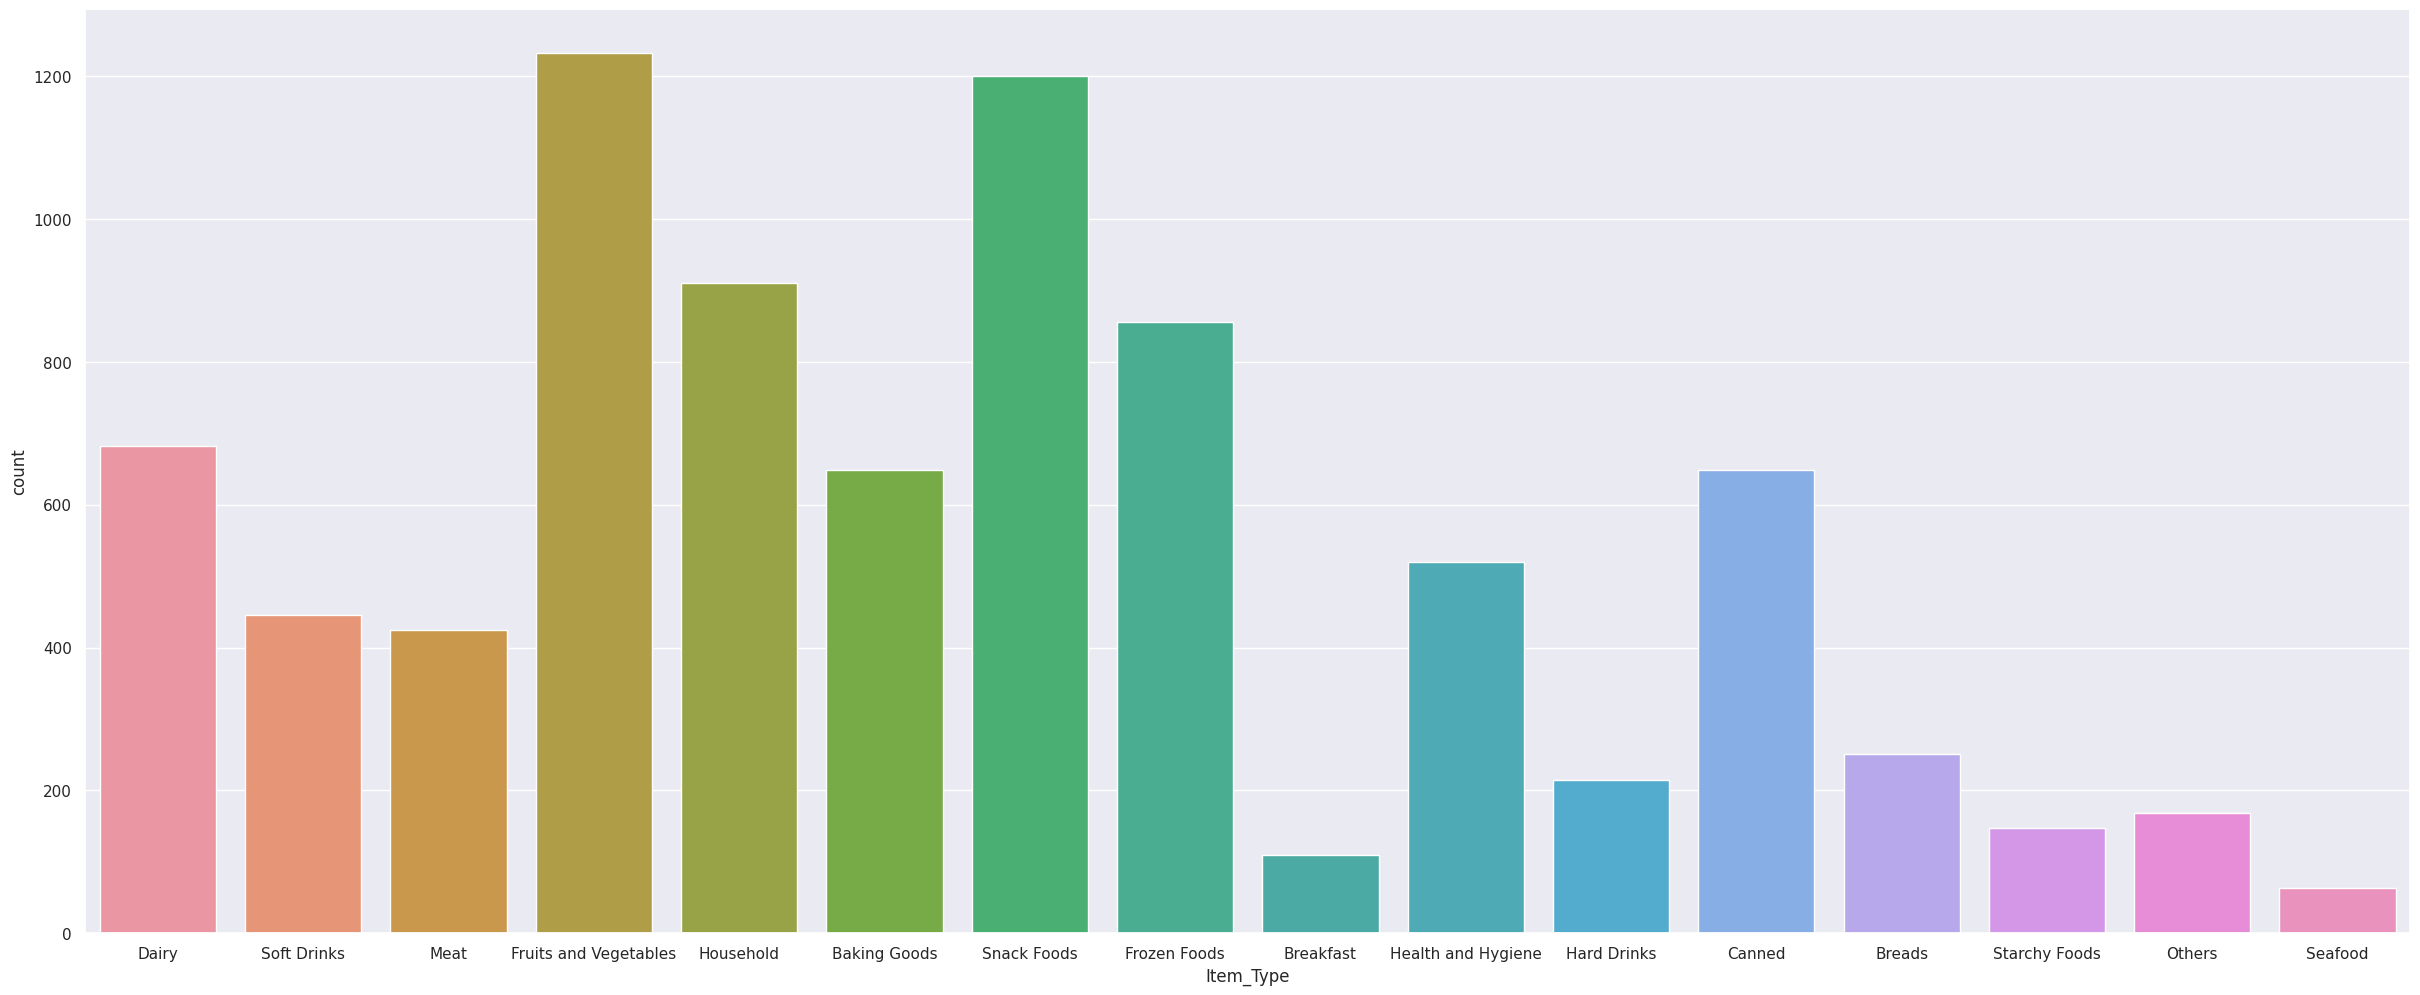

In [162]:
plt.figure(figsize=(30,12))
sns.countplot(x='Item_Type',data=data)
plt.show()

In [163]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Outlet_Type Grocery Store Supermarket Type1 Su...,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [164]:

data['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [165]:
data.replace({'Item_Fat_Content':{'low fat':'Low Fat','LF':'Low Fat','reg':'Regular'}},inplace=True)

In [166]:
data['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

Label Encoding

In [167]:
encoder =LabelEncoder()

In [168]:
data['Item_Identifier']=encoder.fit_transform(data['Item_Identifier'])

data['Item_Fat_Content']=encoder.fit_transform(data['Item_Fat_Content'])

data['Item_Type']=encoder.fit_transform(data['Item_Type'])

data['Outlet_Identifier']=encoder.fit_transform(data['Outlet_Identifier'])

# data['Outlet_Size']=encoder.fit_transform(data['Outlet_Size'])

data['Outlet_Location_Type']=encoder.fit_transform(data['Outlet_Location_Type'])

data['Outlet_Type']=encoder.fit_transform(data['Outlet_Type'])

In [169]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,0,0.016047,4,249.8092,9,1999,Medium,0,1,3735.1380
1,8,5.92,1,0.019278,14,48.2692,3,2009,Medium,2,2,443.4228
2,662,17.50,0,0.016760,10,141.6180,9,1999,Medium,0,1,2097.2700
3,1121,19.20,1,0.000000,6,182.0950,0,1998,Outlet_Type Grocery Store Supermarket Type1 Su...,2,0,732.3800
4,1297,8.93,0,0.000000,9,53.8614,1,1987,High,2,1,994.7052


In [170]:
X=data.drop(columns=['Item_Outlet_Sales','Outlet_Size'],axis=1)
Y=data['Item_Outlet_Sales']

In [171]:
X

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Type
0,156,9.300,0,0.016047,4,249.8092,9,1999,0,1
1,8,5.920,1,0.019278,14,48.2692,3,2009,2,2
2,662,17.500,0,0.016760,10,141.6180,9,1999,0,1
3,1121,19.200,1,0.000000,6,182.0950,0,1998,2,0
4,1297,8.930,0,0.000000,9,53.8614,1,1987,2,1
...,...,...,...,...,...,...,...,...,...,...
8518,370,6.865,0,0.056783,13,214.5218,1,1987,2,1
8519,897,8.380,1,0.046982,0,108.1570,7,2002,1,1
8520,1357,10.600,0,0.035186,8,85.1224,6,2004,1,1
8521,681,7.210,1,0.145221,13,103.1332,3,2009,2,2


In [172]:
Y

0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
8518    2778.3834
8519     549.2850
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: Item_Outlet_Sales, Length: 8523, dtype: float64

In [173]:
X_train,X_test,Y_train,Y_test =train_test_split(X,Y,test_size=0.2,random_state=2)

In [174]:
print(X.shape,X_train.shape,X_test.shape)


(8523, 10) (6818, 10) (1705, 10)


In [175]:
regressor = XGBRegressor()

In [176]:
regressor.fit(X_train,Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [177]:
training_data_prediction = regressor.predict(X_train)

In [178]:
r2_train = metrics.r2_score(Y_train,training_data_prediction)

In [179]:
print('R Squared value = ',r2_train)

R Squared value =  0.8589562021934799


In [180]:
test_data_prediction =regressor.predict(X_test)

In [181]:
r2_test= metrics.r2_score(Y_test,test_data_prediction)

In [182]:
print('R Squared value = ',r2_test)

R Squared value =  0.5304668733482136
